In [1]:
import os
print(os.getcwd())

C:\Users\afifa


In [2]:
cd D:\Afif\yolov8_tracking\yolov5

D:\Afif\yolov8_tracking\yolov5


In [5]:
!python detect.py --weights yolov5s.pt --source "D:\Afif\HTC\AI Questions- April 2023\sample\sample_1.jpg"

detect: weights=['yolov5s.pt'], source=D:\Afif\HTC\AI Questions- April 2023\sample\sample_1.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-114-g3c0a6e6 Python-3.9.12 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 D:\Afif\HTC\AI Questions- April 2023\sample\sample_1.jpg: 352x640 (no detections), 161.9ms
Speed: 4.5ms pre-process, 161.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp6


## 1. Load the image

In [5]:
import imutils
import cv2
img = cv2.imread('D:\Afif\HTC\AI Questions- April 2023\sample\sample_1.jpg')
img2 = cv2.imread('D:\Afif\HTC\AI Questions- April 2023\sample\sample_2.jpg')
img3 = cv2.imread('D:\Afif\HTC\AI Questions- April 2023\sample\sample_3.jpg')
#cv2.imshow('display',img)
cv2.waitKey(0)

-1

## 2. Tagging (manually find value of coordinate, width and height)

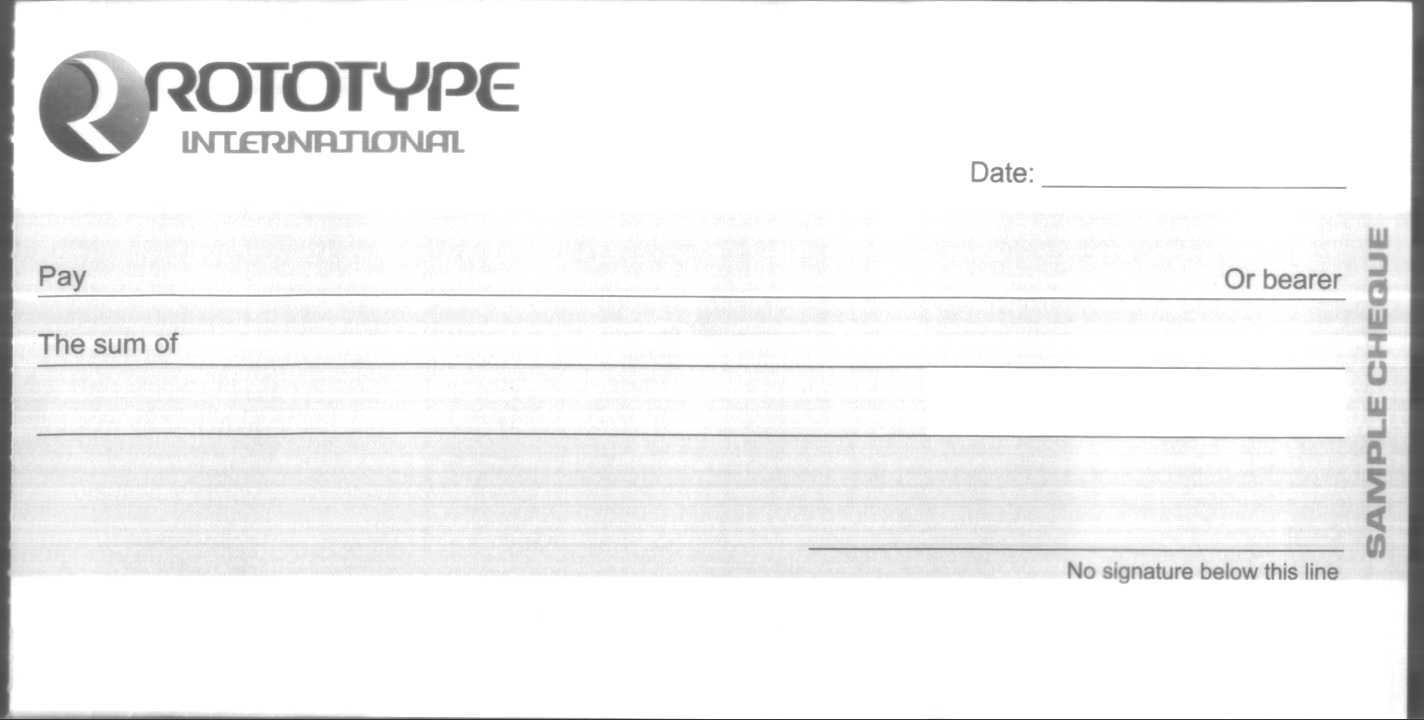

In [4]:
from IPython.display import Image
display(Image(filename='D:\Afif\HTC\AI Questions- April 2023\sample\sample_1.jpg'))

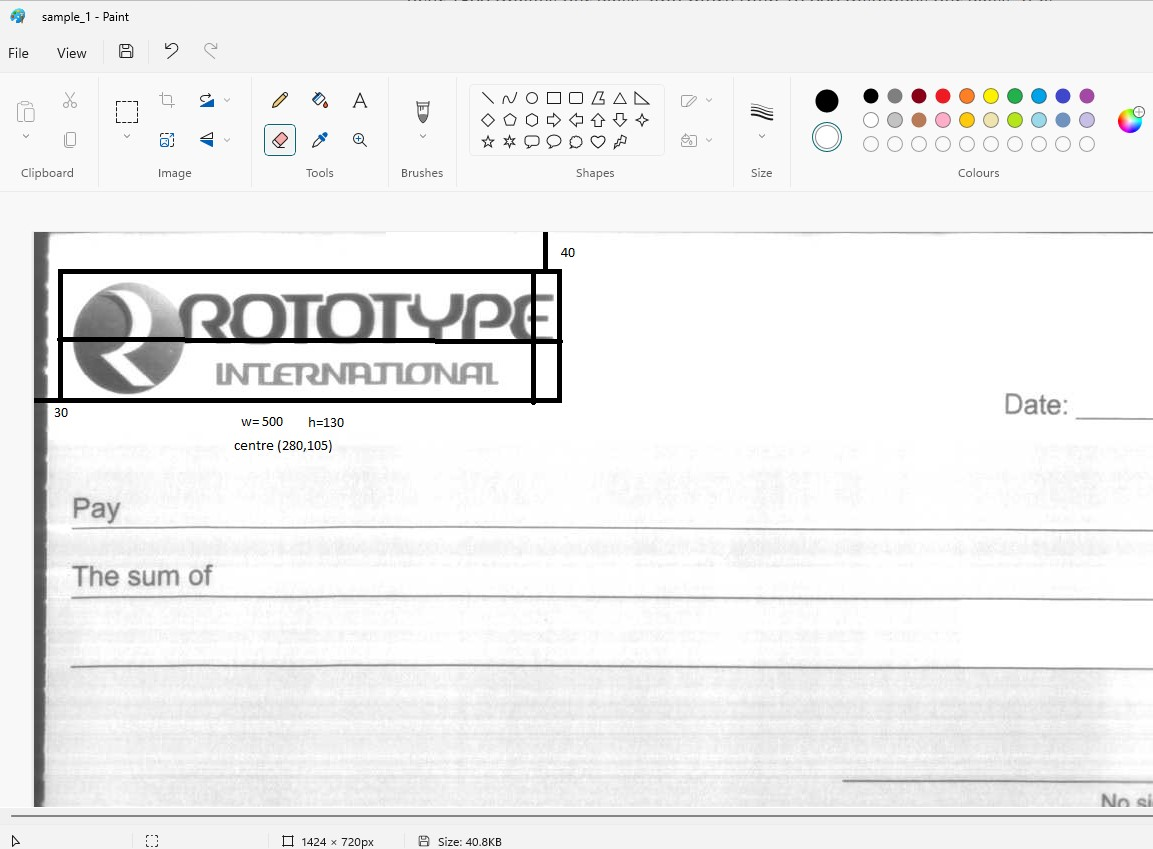

In [5]:
display(Image(filename='D:\Afif\HTC\AI Questions- April 2023\sample\sample_1_tagging.jpg'))

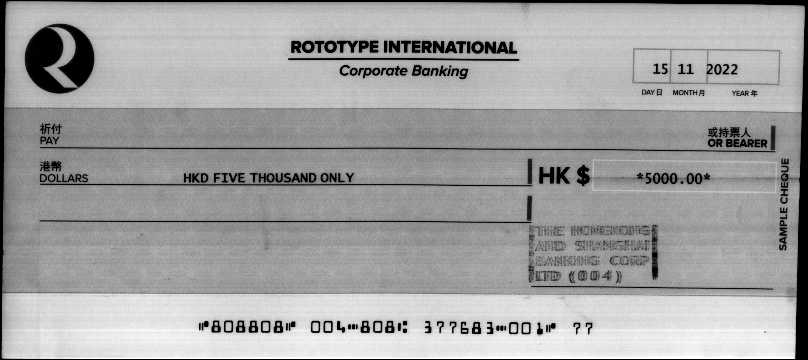

In [6]:
display(Image(filename='D:\Afif\HTC\AI Questions- April 2023\sample\sample_2.jpg'))

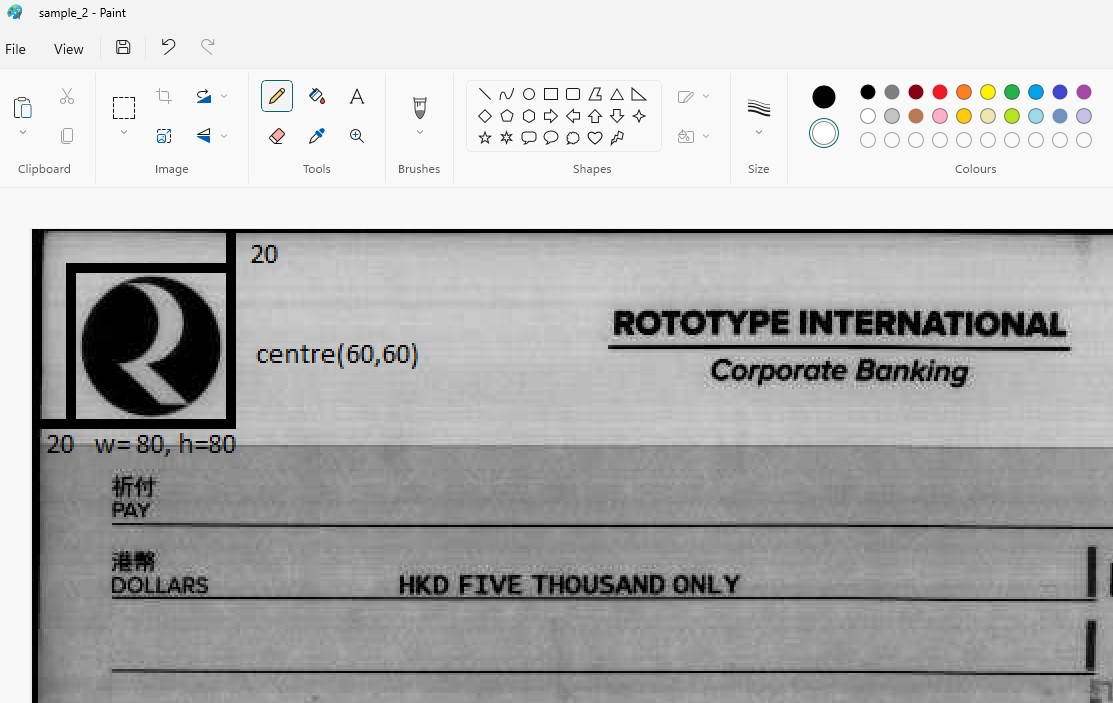

In [7]:
display(Image(filename='D:\Afif\HTC\AI Questions- April 2023\sample\sample_2_tagging.jpg'))

## 3. Create train and val dataset

In [18]:
My_list = [*range(1, 21)]
My_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [19]:
My_list2 = [*range(21, 41,1)]
My_list2

[21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [20]:
# image train data
for x in My_list:
    cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\train\sample_{}.jpg'.format(x),img)
for x in My_list2:
    cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\train\sample_{}.jpg'.format(x),img2)

In [21]:
# image val data
cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\val\sample_1.jpg',img)
cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\val\sample_2.jpg',img2)
cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\val\sample_3.jpg',img3)

True

In [12]:
(h,w,d) = img.shape
print("img -> w={}, h={}".format(w,h))
(h,w,d) = img2.shape
print("img2 -> w={}, h={}".format(w,h))

img -> w=1424, h=720
img2 -> w=808, h=360


In [22]:
# label train data
# <label, x-coor/w img, y-coor/h img, w/w img, h/h img>

L = "0 0.1966292134831461 0.1458333333333333 0.351123595505618 0.1805555555555556"

for x in My_list:
    file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\train\sample_{}.txt'.format(x),"w")
    file1.writelines(L)
    file1.close()

L = "0 0.0742574257425743 0.1666666666666667 0.099009900990099 0.2222222222222222"
    
for x in My_list2:
    file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\train\sample_{}.txt'.format(x),"w")
    file1.writelines(L)
    file1.close() 

In [23]:
# label val data
L = "0 0.1966292134831461 0.1458333333333333 0.351123595505618 0.1805555555555556"
file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\val\sample_1.txt',"w")
file1.writelines(L)
file1.close() 

L = "0 0.0742574257425743 0.1666666666666667 0.099009900990099 0.2222222222222222"
file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\val\sample_2.txt',"w")
file1.writelines(L)
file1.close() 

L = "0 0.2176966292134831 0.0912921348314607 0.3721910112359551 0.1825842696629213"
file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\val\sample_3.txt',"w")
file1.writelines(L)
file1.close() 

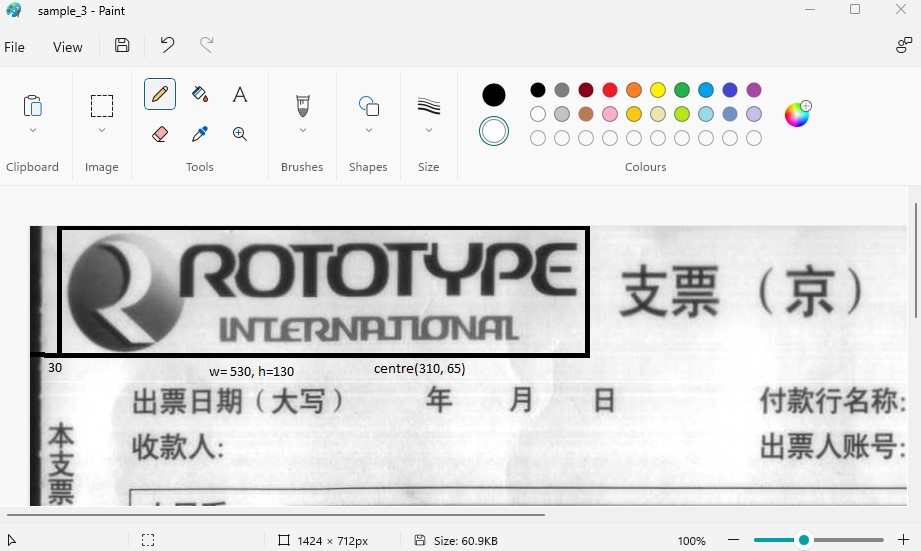

In [35]:
display(Image(filename='D:\Afif\HTC\AI Questions- April 2023\sample\sample_3_tagging.jpg'))

## 4. Train the dataset

In [1]:
cd D:\Afif\yolov8_tracking\yolov5

D:\Afif\yolov8_tracking\yolov5


In [2]:
!pip install clearml

  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.1.0
    Uninstalling PyJWT-2.1.0:
      Successfully uninstalled PyJWT-2.1.0


In [4]:
%%time
!python train.py --img 415 --batch 16 --epochs 2 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

CPU times: total: 93.8 ms
Wall time: 2min 46s


train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

In [14]:
%%time
!python train.py --img 415 --batch 16 --epochs 2 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

CPU times: total: 62.5 ms
Wall time: 2min 43s


train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

In [2]:
%%time
!python train.py --img 415 --batch 16 --epochs 10 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

CPU times: total: 578 ms
Wall time: 4min 32s


train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees

## 5. Detection

In [15]:
!python detect.py --weights D:/Afif/yolov8_tracking/yolov5/runs/train/exp8/weights/best.pt --source D:/Afif/HTC/dataset/sample/sample_1.jpg

detect: weights=['D:/Afif/yolov8_tracking/yolov5/runs/train/exp8/weights/best.pt'], source=D:/Afif/HTC/dataset/sample/sample_1.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 D:\Afif\HTC\dataset\sample\sample_1.jpg: 352x640 (no detections), 139.3ms
Speed: 0.0ms pre-process, 139.3ms inference, 15.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp7


In [16]:
!python detect.py --weights D:/Afif/yolov8_tracking/yolov5/runs/train/exp8/weights/best.pt --source D:/Afif/HTC/dataset/sample/sample_2.jpg

detect: weights=['D:/Afif/yolov8_tracking/yolov5/runs/train/exp8/weights/best.pt'], source=D:/Afif/HTC/dataset/sample/sample_2.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 D:\Afif\HTC\dataset\sample\sample_2.jpg: 288x640 (no detections), 142.7ms
Speed: 0.0ms pre-process, 142.7ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp8


In [17]:
!python detect.py --weights D:/Afif/yolov8_tracking/yolov5/runs/train/exp8/weights/best.pt --source D:/Afif/HTC/dataset/sample/sample_3.jpg

detect: weights=['D:/Afif/yolov8_tracking/yolov5/runs/train/exp8/weights/best.pt'], source=D:/Afif/HTC/dataset/sample/sample_3.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 D:\Afif\HTC\dataset\sample\sample_3.jpg: 320x640 (no detections), 139.7ms
Speed: 0.0ms pre-process, 139.7ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp9


## 6. Need to add more train data. (from 40 pic to 1000 pic)

In [3]:
My_list = [*range(1, 501)]
My_list2 = [*range(501, 1001)]

In [6]:
# image train data
for x in My_list:
    cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\train\sample_{}.jpg'.format(x),img)
for x in My_list2:
    cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\train\sample_{}.jpg'.format(x),img2)
    
# image val data
cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\val\sample_1.jpg',img)
cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\val\sample_2.jpg',img2)
cv2.imwrite(r'D:\Afif\HTC\AI Questions- April 2023\dataset\images\val\sample_3.jpg',img3)

# label train data
# <label, x-coor/w img, y-coor/h img, w/w img, h/h img>

L = "0 0.1966292134831461 0.1458333333333333 0.351123595505618 0.1805555555555556"

for x in My_list:
    file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\train\sample_{}.txt'.format(x),"w")
    file1.writelines(L)
    file1.close()

L = "0 0.0742574257425743 0.1666666666666667 0.099009900990099 0.2222222222222222"
    
for x in My_list2:
    file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\train\sample_{}.txt'.format(x),"w")
    file1.writelines(L)
    file1.close() 
    
# label val data
L = "0 0.1966292134831461 0.1458333333333333 0.351123595505618 0.1805555555555556"
file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\val\sample_1.txt',"w")
file1.writelines(L)
file1.close() 

L = "0 0.0742574257425743 0.1666666666666667 0.099009900990099 0.2222222222222222"
file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\val\sample_2.txt',"w")
file1.writelines(L)
file1.close() 

L = "0 0.2176966292134831 0.0912921348314607 0.3721910112359551 0.1825842696629213"
file1 = open(r'D:\Afif\HTC\AI Questions- April 2023\dataset\labels\val\sample_3.txt',"w")
file1.writelines(L)
file1.close() 

## 7. (A) ReTrain model using 100 epochs + 640 img size (quality)
duration is more than 1hour 15min.

In [2]:
%%time
!python train.py --img 640 --batch 16 --epochs 100 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

^C
CPU times: total: 3.41 s
Wall time: 1h 15min 22s


## 7. (B) ReTrain model using 20 epochs

In [3]:
%%time
!python train.py --img 640 --batch 16 --epochs 20 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

CPU times: total: 594 ms
Wall time: 11min 3s


train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees

## 7. (C) ReTrain model using 50 epochs
30min

In [5]:
%%time
!python train.py --img 640 --batch 16 --epochs 50 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees

CPU times: total: 1.38 s
Wall time: 29min 13s


train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees

       9/49         0G    0.08043    0.03044          0         34        640:   0%|          | 0/3 [00:10<?, ?it/s]
       9/49         0G    0.08043    0.03044          0         34        640:  33%|###3      | 1/3 [00:10<00:20, 10.01s/it]
       9/49         0G    0.08204     0.0302          0         33        640:  33%|###3      | 1/3 [00:19<00:20, 10.01s/it]
       9/49         0G    0.08204     0.0302          0         33        640:  67%|######6   | 2/3 [00:19<00:09,  9.99s/it]
       9/49         0G    0.08167    0.02951          0         16        640:  67%|######6   | 2/3 [00:25<00:09,  9.99s/it]
       9/49         0G    0.08167    0.02951          0         16        640: 100%|##########| 3/3 [00:25<00:00,  7.80s/it]
       9/49         0G    0.08167    0.02951          0         16        640: 100%|##########| 3/3 [00:25<00:00,  8.39s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 [00:00<?, ?it/s]
    

      18/49         0G    0.06131    0.02526          0         26        640:  67%|######6   | 2/3 [00:20<00:10, 10.06s/it]
      18/49         0G    0.06097    0.02635          0         17        640:  67%|######6   | 2/3 [00:25<00:10, 10.06s/it]
      18/49         0G    0.06097    0.02635          0         17        640: 100%|##########| 3/3 [00:25<00:00,  7.85s/it]
      18/49         0G    0.06097    0.02635          0         17        640: 100%|##########| 3/3 [00:25<00:00,  8.44s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  1.78it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  1.78it/s]
                   all          3          3    0.00333          1     0.0583     0.0145

      Epo

## 7. (D) ReTrain model using 80 epochs
38 mins

In [6]:
%%time
!python train.py --img 640 --batch 16 --epochs 80 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

CPU times: total: 1.06 s
Wall time: 38min 24s


train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=80, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees

                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  2.13it/s]
                   all          3          3       0.75      0.998       0.83      0.408

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size

  0%|          | 0/3 [00:00<?, ?it/s]
      45/79         0G    0.04735    0.02106          0         35        640:   0%|          | 0/3 [00:10<?, ?it/s]
      45/79         0G    0.04735    0.02106          0         35        640:  33%|###3      | 1/3 [00:10<00:20, 10.42s/it]
      45/79         0G    0.04354    0.01993          0         29        640:  33%|###3      | 1/3 [00:20<00:20, 10.42s/it]
      45/79         0G    0.04354    0.01993          0         29        640:  67%|######6   | 2/3 [00:20<00:10, 10.34s/it]
      45/79         0G    0.04352    0.02023          0         15        640:  67%|######6   | 2/3 [00:26<00:10, 10.34s/it]
      45/79         0G    0.04352    0.0

      58/79         0G     0.0271    0.01599          0         28        640:  33%|###3      | 1/3 [00:20<00:20, 10.28s/it]
      58/79         0G     0.0271    0.01599          0         28        640:  67%|######6   | 2/3 [00:20<00:10, 10.31s/it]
      58/79         0G    0.03094    0.01568          0         13        640:  67%|######6   | 2/3 [00:25<00:10, 10.31s/it]
      58/79         0G    0.03094    0.01568          0         13        640: 100%|##########| 3/3 [00:25<00:00,  8.02s/it]
      58/79         0G    0.03094    0.01568          0         13        640: 100%|##########| 3/3 [00:25<00:00,  8.64s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  2.18it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1

## 7. (E) ReTrain model using 100 epochs
49 mins

In [2]:
%%time
!python train.py --img 640 --batch 16 --epochs 100 --weights yolov5s.pt --data D:/Afif/HTC/dataset/config.yaml

CPU times: total: 1.84 s
Wall time: 49min 20s


train: weights=yolov5s.pt, cfg=, data=D:/Afif/HTC/dataset/config.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-163-g016e0462 Python-3.9.12 torch-1.13.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degree

       7/99         0G    0.09316    0.03319          0         41        640:  67%|######6   | 2/3 [00:22<00:10, 10.99s/it]
       7/99         0G    0.09328    0.03132          0         18        640:  67%|######6   | 2/3 [00:27<00:10, 10.99s/it]
       7/99         0G    0.09328    0.03132          0         18        640: 100%|##########| 3/3 [00:27<00:00,  8.53s/it]
       7/99         0G    0.09328    0.03132          0         18        640: 100%|##########| 3/3 [00:27<00:00,  9.20s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%|          | 0/1 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  1.18it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|##########| 1/1 [00:00<00:00,  1.18it/s]
                   all          3          3    0.00222      0.667    0.00318   0.000626

      Epo

  0%|          | 0/3 [00:00<?, ?it/s]
      18/99         0G    0.06802    0.02464          0         29        640:   0%|          | 0/3 [00:10<?, ?it/s]
      18/99         0G    0.06802    0.02464          0         29        640:  33%|###3      | 1/3 [00:10<00:21, 10.92s/it]
      18/99         0G    0.06348    0.02434          0         26        640:  33%|###3      | 1/3 [00:21<00:21, 10.92s/it]
      18/99         0G    0.06348    0.02434          0         26        640:  67%|######6   | 2/3 [00:21<00:10, 10.83s/it]
      18/99         0G    0.06409     0.0252          0         17        640:  67%|######6   | 2/3 [00:27<00:10, 10.83s/it]
      18/99         0G    0.06409     0.0252          0         17        640: 100%|##########| 3/3 [00:27<00:00,  8.51s/it]
      18/99         0G    0.06409     0.0252          0         17        640: 100%|##########| 3/3 [00:27<00:00,  9.14s/it]

                 Class     Images  Instances          P          R      mAP50   mAP50-95:   0%